In [38]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score
)

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from utils.functions import show_random_images, plot_class_distributions

In [39]:
def img_flatten(X):
    return X.reshape(X.shape[0], -1)

def data_norm(X):
    return X/255

In [40]:
# Fetch data
# load dataset
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

# Summarize dataset, displaying number of train and test examples etc.
print('Train set data:')
print(Xtrain.shape)
print(ytrain.shape)
print('--------------')
print('Test set data:')
print(Xtest.shape)
print(ytest.shape)

Train set data:
(60000, 28, 28)
(60000,)
--------------
Test set data:
(10000, 28, 28)
(10000,)


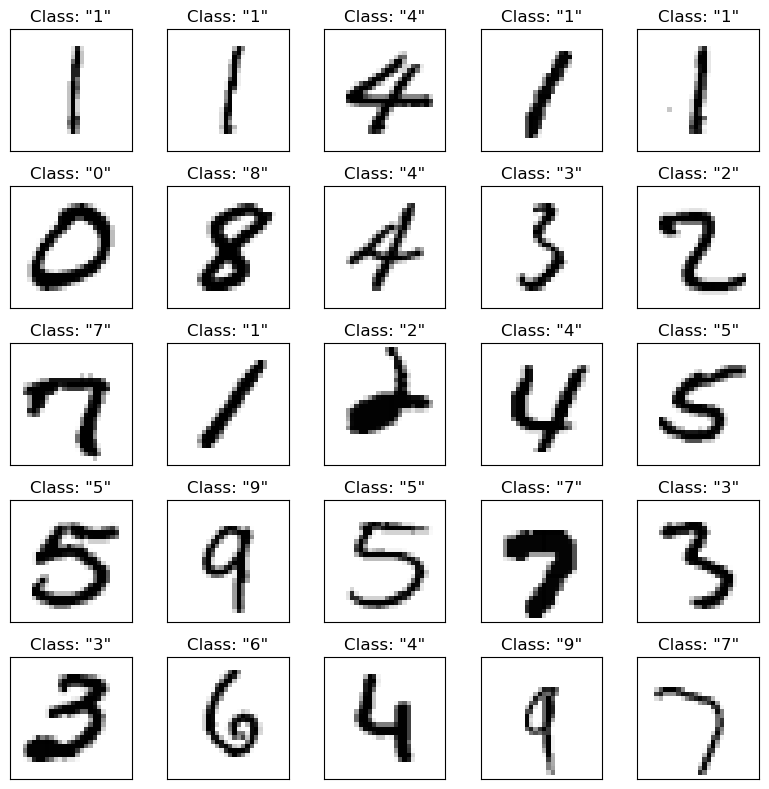

In [41]:
show_random_images(Xtrain, ytrain)

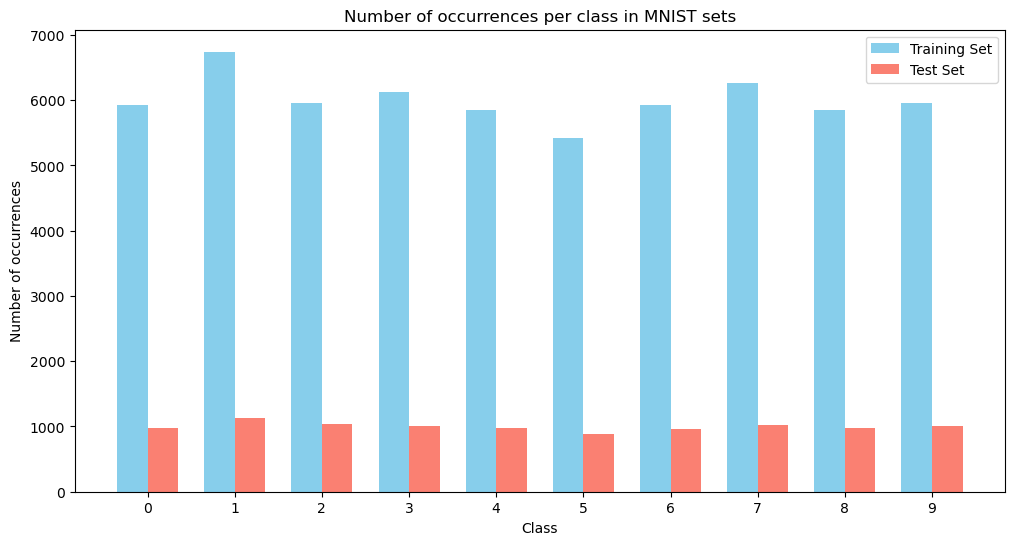

In [42]:
plot_class_distributions(ytrain, ytest, bar_width=0.35, figsize=(12, 6))

# Binary classification using ANN

We will be differentiating between one of the two selected digits. In this example, we do it for numbers 4 and 9

In [43]:
# Filter the training data for binary classification
first_digit = 9
second_digit = 4

train_mask = (ytrain == first_digit) | (ytrain == second_digit)
test_mask = (ytest == first_digit) | (ytest == second_digit)

Xtrain_binary = Xtrain[train_mask]
ytrain_binary = ytrain[train_mask]

Xtest_binary = Xtest[test_mask]
ytest_binary = ytest[test_mask]

ytrain_simple = (ytrain_binary == first_digit).astype(int)
ytest_simple = (ytest_binary == first_digit).astype(int)

# Update the data
Xtrain = Xtrain_binary.copy()
Xtest = Xtest_binary.copy()

ytrain = ytrain_simple.copy()
ytest = ytest_simple.copy()

In [44]:
print(f"Train test size: {ytrain_simple.shape}")
print(f"Test test size: {ytest_simple.shape}")

Train test size: (11791,)
Test test size: (1991,)


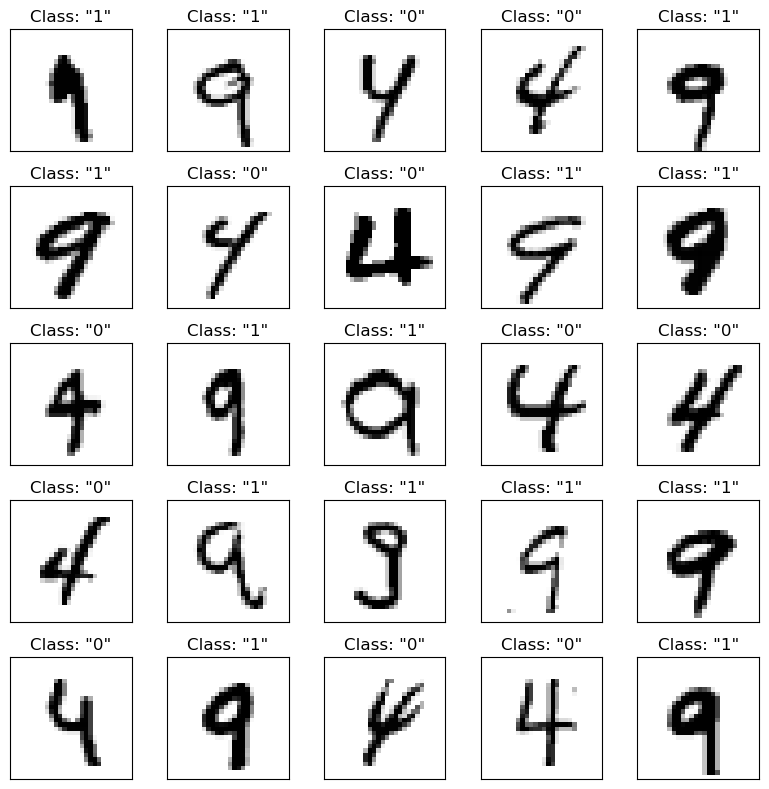

In [45]:
show_random_images(Xtrain_binary, ytrain_simple)

## Preprocess images

In [46]:
# Flatten the images
Xtrain_flatten = img_flatten(Xtrain)
Xtest_flatten = img_flatten(Xtest)

# Normalize the images
Xtrain_norm = data_norm(Xtrain_flatten)
Xtest_norm = data_norm(Xtest_flatten)

print(f'Minimum pixel value: {np.min(Xtrain_norm[0])}')
print(f'Maximum pixel value: {np.max(Xtrain_norm[0])}')

# Update the training and testing data
Xtrain = Xtrain_norm.copy()
Xtest = Xtest_norm.copy()

Minimum pixel value: 0.0
Maximum pixel value: 1.0


## Neural Network Model

In [47]:
print(f"Input size: {Xtrain.shape}")

Input size: (11791, 784)


In [48]:
# Define network architecture
n_features = Xtrain.shape[1]

L1 = 8
L2 = 2
L3 = 1

model = Sequential(
    [
        tf.keras.Input(shape=(n_features, )),    #specify input size
        Dense(units=L1, activation='relu', name='Layer1'),
        Dense(units=L2, activation='relu', name='Layer2'),
        Dense(units=L3, activation='sigmoid', name='Layer3')
    ], name = "NN_ver_01"
)

model.summary()

Model: "NN_ver_01"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer1 (Dense)                  │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer2 (Dense)                  │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer3 (Dense)                  │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,301 (24.61 KB)

 Trainable params: 6,301 (24.61 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
#### Examine Weights shapes
[layer1, layer2, layer3] = model.layers

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 8), b1 shape = (8,)
W2 shape = (8, 2), b2 shape = (2,)
W3 shape = (2, 1), b3 shape = (1,)


### Train the network

Epoch 1/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3248 - val_loss: 0.1228
Epoch 2/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1022 - val_loss: 0.0916
Epoch 3/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0659 - val_loss: 0.0828
Epoch 4/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0435 - val_loss: 0.0688
Epoch 5/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0382 - val_loss: 0.0694
Epoch 6/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0357 - val_loss: 0.0755
Epoch 7/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0342 - val_loss: 0.0589
Epoch 8/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0304 - val_loss: 0.0605
Epoch 9/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0269 - val_loss: 0.0622
Epoch 10/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0218 - val_loss: 0.0589
Epoch 11/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0164 - val_loss: 0.0780
Epoch 12/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

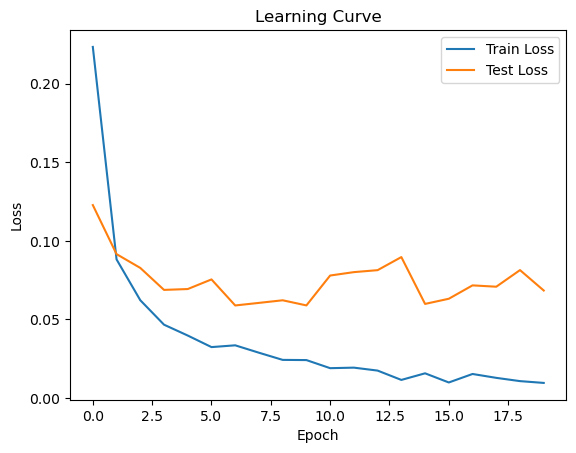

In [50]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

history = model.fit(
    Xtrain, ytrain,
    epochs=20,
    validation_data=(Xtest, ytest)
)

# Plotting the training and test loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')

plt.title('Learning Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Save the learning curve
plt.savefig('learning_curve.png')

plt.show()

In [51]:
# Evaluate the model
predictions_train = model.predict(Xtrain).flatten()
predictions_test = model.predict(Xtest).flatten()

yhat_train = (predictions_train >= 0.5).astype(int)
yhat_test = (predictions_test >= 0.5).astype(int)

369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step


In [52]:
accuracy_train = accuracy_score(ytrain, yhat_train)
accuracy_test = accuracy_score(ytest, yhat_test)

print(f"Accuracy on a training set: {accuracy_train:.4f}")
print(f"Accuracy on a test set: {accuracy_test:.4f}")

# Print number of misclassified images
print(sum(ytest != yhat_test))
print(f'Test size: {ytest.shape[0]}')

Accuracy on a training set: 0.9985
Accuracy on a test set: 0.9849
30
Test size: 1991
